### K-Means Clustering

K-Means clustering is a partitioning method used in machine learning and data analysis to group similar data points into a pre-specified number of clusters. The "K" in K-Means refers to the number of clusters the algorithm aims to find in the data. It is an unsupervised learning algorithm, meaning that it doesn't require labeled data for training.



In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import pandas as pd
import numpy as np

income = pd.read_csv('/content/drive/MyDrive/income.csv')
income.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [6]:
income.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [7]:
income.shape

(22, 3)

In [8]:
income.drop('Name', axis = 1, inplace = True)

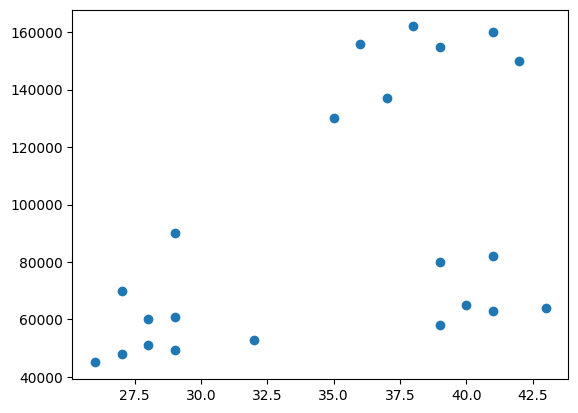

In [9]:
import matplotlib.pyplot as plt

plt.scatter(income['Age'], income['Income($)'])

In [10]:
income

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [11]:
income.isnull().sum()

Age          0
Income($)    0
dtype: int64

In [12]:
income.dtypes

Age          int64
Income($)    int64
dtype: object

In [13]:
from sklearn.cluster import KMeans
import numpy as np

model_k = KMeans(n_clusters = 3)
cluster_labels = model_k.fit_predict(income[['Age', 'Income($)']])
cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [14]:
income['cluster'] = cluster_labels
income.head()

,Age,Income($),cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


In [15]:
model_k.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

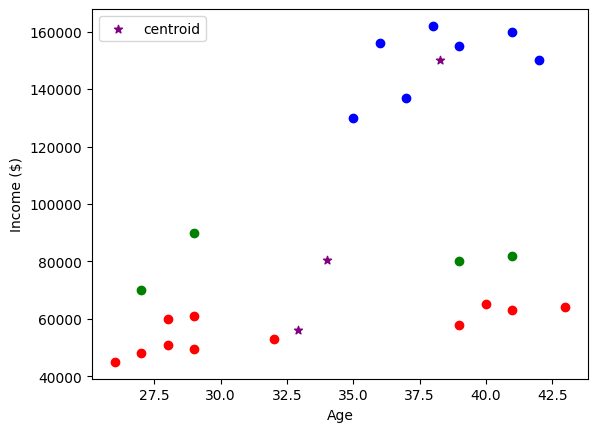

In [16]:
income1 = income[income['cluster'] == 0]
income2 = income[income['cluster'] == 1]
income3 = income[income['cluster'] == 2]
plt.scatter(income1['Age'],income1['Income($)'],color='green')
plt.scatter(income2['Age'],income2['Income($)'],color='blue')
plt.scatter(income3['Age'],income3['Income($)'],color='red')
plt.scatter(model_k.cluster_centers_[:,0],model_k.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

### Preprocessing - Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
income['Age'] = mm.fit_transform(income[['Age']])
income['Income($)'] = mm.fit_transform(income[['Income($)']])

In [19]:
income.head()

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1


In [20]:
from sklearn.cluster import KMeans
import numpy as np

model_k = KMeans(n_clusters = 3)
cluster_labels = model_k.fit_predict(income[['Age', 'Income($)']])
cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [21]:
income['cluster'] = cluster_labels
income.head()

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2


In [22]:
model_k.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

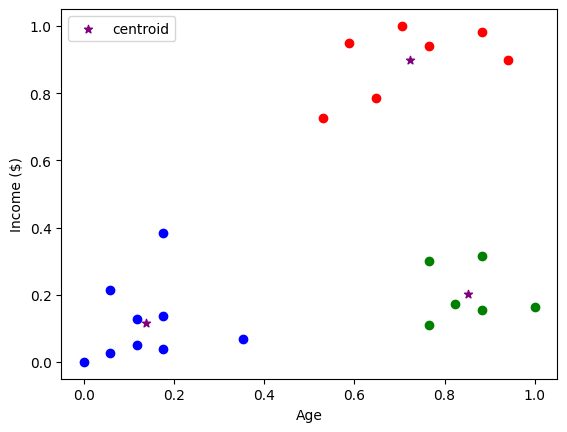

In [24]:
income1 = income[income['cluster'] == 0]
income2 = income[income['cluster'] == 1]
income3 = income[income['cluster'] == 2]
plt.scatter(income1['Age'],income1['Income($)'],color='green')
plt.scatter(income2['Age'],income2['Income($)'],color='blue')
plt.scatter(income3['Age'],income3['Income($)'],color='red')
plt.scatter(model_k.cluster_centers_[:,0],model_k.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

To know the best k value to use, we will be using the Elbow method.

The idea of the Elbow method is to run k-means clustering on the dataset for a range of values of k, and for each value of k calculate SSE(sum of square error).

In [26]:
inertia = []
n_clusters = 10

for k in range(1,n_clusters):
  model_k = KMeans(n_clusters = k)
  model_k.fit(income[['Age','Income($)']])
  inertia.append(model_k.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [27]:
inertia

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2621792762345213,
 0.22443334487241423,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426]

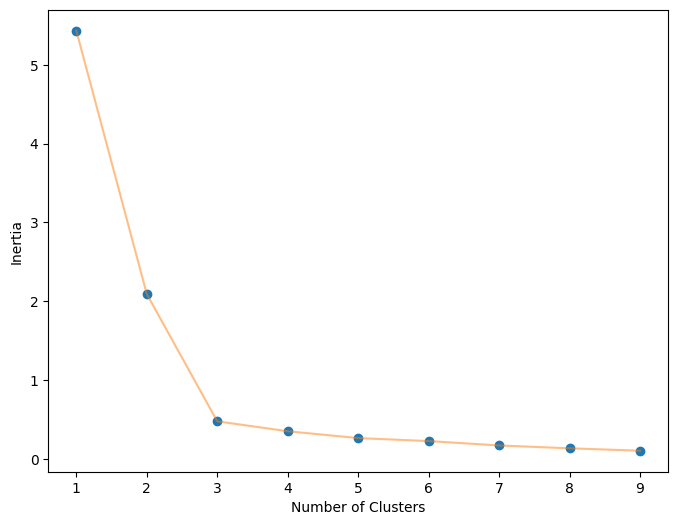

In [28]:
import matplotlib.pyplot as plt

plt.figure(1 , figsize = (8 ,6))
plt.plot(np.arange(1 , n_clusters) , inertia , 'o')
plt.plot(np.arange(1 , n_clusters) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

From the above plot, it seems elbow is around 2

We can then build the KMeans cluster with
number of clusters as 2

The closer the datapoint to the cluster the better the model

In [31]:
model_k = KMeans(n_clusters = 3)
cluster_labels = model_k.fit_predict(income[['Age', 'Income($)']])
cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [32]:
# Calculate metrics

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
inertia = model_k.inertia_
silhouette = silhouette_score(income, model_k.labels_)
calinski = calinski_harabasz_score(income, model_k.labels_)
davies = davies_bouldin_score(income, model_k.labels_)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski}")
print(f"Davies-Bouldin Index: {davies}")

Inertia: 0.4750783498553096
Silhouette Score: 0.8440618526317891
Calinski-Harabasz Index: 358.21048656558173
Davies-Bouldin Index: 0.1978485678602051


Inertia measures the sum of squared distances of samples to their closest cluster center. Lower inertia indicates tighter clusters. It's directly accessible via the inertia_ attribute of the KMeans object in scikit-learn.

This score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a higher value indicates better-defined clusters. This score is available through silhouette_score in scikit-learn.

Calinski-Harabasz Index: Also known as the Variance Ratio Criterion, this index computes the ratio of dispersion between and within clusters. A higher score indicates better-defined clusters. It can be computed using calinski_harabasz_score in scikit-learn.

Davies-Bouldin Index: This index measures the average similarity between each cluster and its most similar one based on their centroids. Lower values indicate better clustering. You can compute this using davies_bouldin_score in scikit-learn.